### 本质：KNN的主要思想是找到与待测样本最接近的k个样本，然后把这k个样本出现次数最多的类别作为待测样本的类别

## 步骤：

1. load data # 随机数加载 np.random.choice() train test {iamges,labels}
2. knn test train distance 5*500=2500次
3. knn k个最近的图片 每张test对应500张train，找出最近的4张
4. 获得最近四张图片的下标
5. 获得具体的数字
6. 检测概率统计

In [1]:
import tensorflow as tf
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST",one_hot=True)
# 属性设置
trainNum = 55000
testNum = 10000
trainSize = 500
testSize = 5

Extracting MNIST\train-images-idx3-ubyte.gz
Extracting MNIST\train-labels-idx1-ubyte.gz
Extracting MNIST\t10k-images-idx3-ubyte.gz
Extracting MNIST\t10k-labels-idx1-ubyte.gz


In [38]:
# data 分解 详情看np.random.choice()
trainIndex = np.random.choice(trainNum,trainSize,replace=False)
testIndex = np.random.choice(testNum,testSize,replace=False)
trainData = mnist.train.images[trainIndex] # 获取训练图片
trainLabels = mnist.train.labels[trainIndex] # 获取训练标签
testData = mnist.test.images[testIndex]
testLabels = mnist.test.labels[testIndex]
print("trainData.shape=",trainData.shape)
print("trainLabels.shape=",trainLabels.shape)
print("testData.shape=",testData.shape)
print("testLabels.shape=",testLabels.shape)

trainData.shape= (500, 784)
trainLabels.shape= (500, 10)
testData.shape= (5, 784)
testLabels.shape= (5, 10)


2


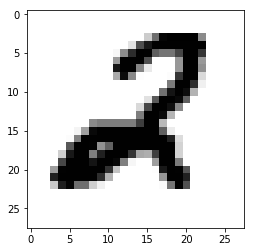

In [39]:
# 展示一下图片和标签
img = trainData[0].reshape((28,28))
# print(trainData[0])
print(np.argmax(trainLabels[0]))
plt.imshow(img,cmap="binary")
# # cv2.imshow("img",img)
# # cv2.waitKey(0)

In [40]:
# tf input  
trainDataInput = tf.placeholder(tf.float32,[None,784])
trainLabelInput = tf.placeholder(tf.float32,[None,10])
testDataInput = tf.placeholder(tf.float32,[None,784])
testLabelInput = tf.placeholder(tf.float32,[None,10])

In [41]:
# knn distance的计算
f1 = tf.expand_dims(testDataInput,1) # 维度扩展
f2 = tf.subtract(trainDataInput,f1)
f3 = tf.reduce_sum(tf.abs(f2),reduction_indices=2) # 完成数据累加 784像素点的差值
f4 = tf.negative(f3) # 取反
f5,f6 = tf.nn.top_k(f4,k=4) # 选取f4中最大的四个值,f5是值，f6是下标
f7 = tf.gather(trainLabelInput,f6) # 取对应图片的labels
f8 = tf.reduce_sum(f7,reduction_indices=1)
f9 = tf.argmax(f8,axis=1) # 选取在某一个最大的值的index

with tf.Session() as sess:
    p1 = sess.run(f1,feed_dict={testDataInput:testData[:5]})
    print(p1.shape)
    p2 = sess.run(f2,feed_dict={trainDataInput:trainData,testDataInput:testData[:5]})
    print(p2.shape)
    p3 = sess.run(f3,feed_dict={trainDataInput:trainData,testDataInput:testData[:5]})
    print(p3.shape,"第一张的距离为=",p3[0,0])
    p4 = sess.run(f4,feed_dict={trainDataInput:trainData,testDataInput:testData[:5]})
    print("p4的shape=",p4.shape)
    
    p5,p6 = sess.run([f5,f6],feed_dict={trainDataInput:trainData,testDataInput:testData[:5]})
    print("p5.shape=",p5.shape) # 值
    print("p6.shape=",p6.shape) # 对应值的下标
    
    p7 = sess.run(f7,feed_dict={trainDataInput:trainData,testDataInput:testData[:5],trainLabelInput:trainLabels})
#     print(np.argmax(p7,axis=2))
    print("p7=",p7.shape)
    
    p8 = sess.run(f8,feed_dict={trainDataInput:trainData,testDataInput:testData[:5],trainLabelInput:trainLabels})
    print("p8.shape=",p8.shape)
    p9 = sess.run(f9,feed_dict={trainDataInput:trainData,testDataInput:testData[:5],trainLabelInput:trainLabels})
    print(p9)
print("==="*20)
y = np.argmax(testLabels,axis=1)
count = 0
print(y)
print(p9)
for i in range(5):
    if p9[i]==y[i]:
        count += 1

print(count*100/5,"%")
    

(5, 1, 784)
(5, 500, 784)
(5, 500) 第一张的距离为= 175.953
p4的shape= (5, 500)
p5.shape= (5, 4)
p6.shape= (5, 4)
p7= (5, 4, 10)
p8.shape= (5, 10)
[7 1 3 3 8]
[7 2 3 3 8]
[7 1 3 3 8]
80.0 %
